```
補助本「ゼロから作るDeep Learning」
3章～7章までを輪読会の補足として、読んで行きます。
Eli Kaminuma 2018.1.31
```

### 補助本4章 [2018.2.13]
# 4章　ニューラルネットワークの学習

- ニューラルネットワークの学習に関する基本的な知識を学ぶ
- 目次

```
4.1 データから学習する 
4.1.1 データ駆動 
4.1.2 訓練データとテストデータ 

4.2 損失関数 
4.2.1 2乗和誤差 
4.2.2 交差エントロピー誤差 
4.2.3 ミニバッチ学習 
4.2.4 [バッチ対応版]交差エントロピー誤差の実装 
4.2.5 なぜ損失関数を設定するのか? 

4.3 数値微分 
4.3.1 微分
4.3.2 数値微分の例 
4.3.3 偏微分 
4.4 勾配 
4.4.1 勾配法 
4.4.2 ニューラルネットワークに対する勾配 

4.5 学習アルゴリズムの実装
4.5.1 2 層ニューラルネットワークのクラス 
4.5.2 ミニバッチ学習の実装 
4.5.3 テストデータで評価 
```

***

### 4.1 データから学習する
```
＜従来の学習方法＞
input→[人の考えた特徴量(SIFT,HOGなど)]→[機械学習(SVN,KNNなど)]→答え

＜ニューラルネットワーク（ディープラーニング）＞
input→[人の考えた特徴量(SIFT,HOGなど)]→[機械学習(SVN,KNNなど)]→答え
```

***

### 4.2 損失関数

- ニューラルネットワークの性能の悪さを示す指標
- 教師データにどれだけ一致していないかを表す
- 一般に「2乗和誤差」,「交差エントロピー誤差」 が使われる

#### 4.2.1    2乗和誤差

- 2乗和誤差（mean squared error:MSE）
- 数式

$
\begin{equation}
\qquad \quad      E=\frac{1}{2}\Sigma_{k}(y_{k}-t_{k})^2
\end{equation}
$

        *  $y_{k}$ : ニューラルネットワークの出力
        *  $t_{k}$ : 教師データ(正解ラベルが1でその他0)
        *  $k$ : データの次元数　

In [22]:
#-----------------------------------
# [4.2.2] 2乗和誤差
#  pp.88-89
# --------------------------------  
# 　-  損失関数として最も有名
#   - 2乗和誤差(mean squared error:MSE)
# --------------------------------
import numpy as np
import matplotlib.pylab as plt


def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

t_array=np.array(t)
y1_array=np.array(y1)
y2_array=np.array(y2)
mse1 = mean_squared_error(y1_array, t_array)
mse2 = mean_squared_error(y2_array, t_array)
print('MSE(y1,t)= %0.05f ' % mse1)
print('MSE(y2,t)= %0.05f ' % mse2)
#plt.plot(X, Y)
#plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
#plt.show()


MSE(y1,t)= 0.09750 
MSE(y2,t)= 0.59750 



#### 4.2.2   交差エントロピー誤差

- 交差エントロピー誤差(cross entropy error)
- 数式

$
\begin{equation}
\qquad \quad      E= - \Sigma_{k} t_{k} log (y_{k})
\end{equation}
$


        *  $log$ : 自然対数
        *  $y_{k}$ : ニューラルネットワークの出力
        *  $t_{k}$ : 教師データ(正解ラベルが1でその他0)
        *  $k$ : データの次元数　


CEE(y1,t)= 0.51083 
CEE(y2,t)= 2.30258 


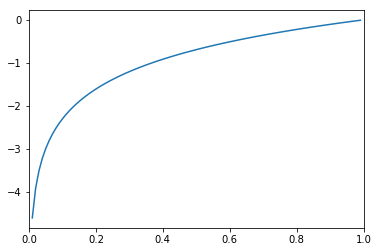

In [23]:
#-----------------------------------
# [4.2.2] 交差エントロピー誤差
#  pp.89-91
# --------------------------------  
# 　- 損失関数として2乗和誤差と共に良く使われる
#   - 交差エントロピー誤差(cross entropy error)
# --------------------------------
import numpy as np
import matplotlib.pylab as plt


def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

t_array=np.array(t)
y1_array=np.array(y1)
y2_array=np.array(y2)
cee1 = cross_entropy_error(y1_array, t_array)
cee2 = cross_entropy_error(y2_array, t_array)
print('CEE(y1,t)= %0.05f ' % cee1)
print('CEE(y2,t)= %0.05f ' % cee2)

#---plot y=log(x)
X = np.arange(0.01, 1.0, 0.01)
plt.plot(X, np.log(X))
plt.xlim(0, 1) 
plt.show()


#### 4.2.3   ミニバッチ学習

- 交差エントロピー誤差(cross entropy error)の総和
- 数式

$
\begin{equation}
\qquad \quad      E= -\frac{1}{N} \Sigma_{n} \Sigma_{k} t_{nk} log (y_{nk})
\end{equation}
$


        *  $N$ : データ数
        *  $y_{nk}$ : ニューラルネットワークの出力
        *  $t_{nk}$ : 教師データ(n個目のデータのk番目の値)
        *  $k$ : データの次元数　


In [24]:
#-----------------------------------
# [4.2.4 -(1)] 　ミニバッチ学習
#  pp.91-93
# --------------------------------  
# 　- 訓練データから一部(ミニバッチ)を取り出しミニバッチ毎に学習
#   - ミニバッチ学習例＝60,000枚から100枚を無作為に選んで学習
# --------------------------------
import matplotlib.pylab as plt
import sys, os
sys.path.append('./')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from saitobook.dataset.mnist import load_mnist
from saitobook.common.functions import sigmoid, softmax


#-----data load------------
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

#-----split data into batch-----------------
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000, 10)


(60000, 784)
(60000, 10)


array([41155, 11236,  8346, 58448, 39600, 36313, 26662, 28524, 51688,
       59670])

In [25]:
#----------------------------------------------------
# [4.2.4 -(2)] 　バッチ対応版CrossEntropyError
#  pp.94-95
# ---------------------------------------------------  
# 　- 訓練データから一部(ミニバッチ)を取り出す
#   - バッチ対応型のCrossEntropyErrorを計算
# ------------------------------------------------
import matplotlib.pylab as plt
import sys, os
sys.path.append('./')  
import numpy as np
import pickle
from saitobook.dataset.mnist import load_mnist
from saitobook.common.functions import sigmoid, softmax

#-------batch対応型CEE(batch_sizeで割る)------------------
def cross_entropy_error_batch(y, t):
    delta = 1e-7
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y+delta)) / batch_size


#-------t,yを2回並べて20要素のデータ作成----------------------------
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t_train=np.array(t)
y_train=np.array(y)

train_size = y_train.shape[0]
print('y.shape[0]',train_size)
#----20中10要素をランダムに選択してミニバッチとする------
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print('batch_mask= ', batch_mask)

t_batch = t_train[batch_mask]
y_batch = y_train[batch_mask]
#----cross entropyの計算--------------------------
cee_batch = cross_entropy_error_batch(y_batch, t_batch)
print('CEE_BATCH(y,t)= %0.05f ' % cee_batch)



y.shape[0] 20
batch_mask=  [ 6 19  3 12 17 19 11  7 15 14]
CEE_BATCH(y,t)= 0.51083 


***

### 4.3 数値微分

- 勾配法では、勾配の情報を使って進む方向を決める。
- 4.4で勾配を勉強する前に、基礎の微分について学ぶ。

#### 4.3.1 微分
#### 4.3.2 数値微分の例

- 数値微分(numerical differentiation)＝関数のグラフ上で近接した2点を結ぶ直線を計算して微分値の近似値とする方法
- 丸め誤差(rounding error)=小数の小さな範囲で数値が省略されて生じる誤差

0.1999999999990898


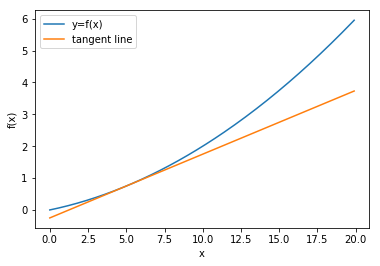

In [26]:
# 図4.7の計算　 pp.101
#
#
import numpy as np
import matplotlib.pylab as plt

#f(x+h),f(x-h)の両方を使う事で誤差を減らす
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

#関数
def function_1(x):
    return 0.01*x**2 + 0.1*x 

#接線
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y,  label="y=f(x)")
plt.plot(x, y2,  label="tangent line")
plt.legend() 
plt.show()


#### 4.3.3 偏微分

- 偏微分(partial differentiation)＝x0,x1の2変数のどちらに対しての微分かを区別する方法
\begin{equation}
\qquad \quad  \frac{\partial f}{\partial x_{0}},   \frac{\partial f}{\partial x_{1}}
\end{equation}

- 勾配(gradient)=全ての偏微分をベクトルとしてまとめたもの
\begin{equation}
\qquad \quad v = ( \frac{\partial f}{\partial x_{0}},   \frac{\partial f}{\partial x_{1}} )
\end{equation}


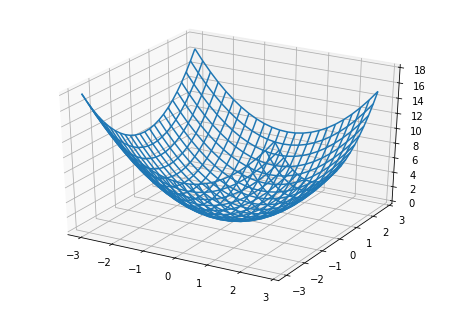

In [37]:
# 図4.8の計算　 pp.102
#　f(x0,x1)=x0^2+x1^2のグラフ
#

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def function_2(x):
    return x[0]**2 + x[1]**2

x0 = np.arange(-3, 3, 0.25)
x1 = np.arange(-3, 3, 0.25)

X = np.meshgrid(x0,x1)
Z = function_2(X)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X[0],X[1],Z) 
plt.show()


In [46]:
#-------------------------------------------------------
# p.103 偏微分の計算
# x[0]**2 + x[1]**2の偏微分式は2*x[0]もしくは2*x[1]
#--------------------------------------------------
import numpy as np

def function_2(x):
    return x[0]**2 + x[1]**2
def function_tmp1(x):
    return 2*x[0]
def function_tmp2(x):
    return 2*x[1]

x0 = 3
x1 = 4

print('df_x0(x0=3,x1=4)=',function_tmp1((x0,x1)))
print('df_x1(x0=3,x1=4)=',function_tmp2((x0,x1)))


df_x0(x0=3,x1=4)= 6
df_x1(x0=3,x1=4)= 8


***

### 4.4 勾配

#### 4.4.1 勾配法
- 勾配法(Gradient method)
- 機械学習の最適化問題でよく使われる方法
- 最小値を探す場合は、勾配降下法(Gradient Descent Method)
- 最大値を探す場合は、勾配上昇法(Gradient Ascend Method)
- 勾配法の数式

- 学習率(learning rate)=一回の学習でどれだけ学習すべきかを決めるパラメータ
- ハイパーパラメータ＝人の手によって設定されるパラメータ。普通のパラメータは自動でパラメータ値が獲得されるが、ハイパーパラメータは獲得されない。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


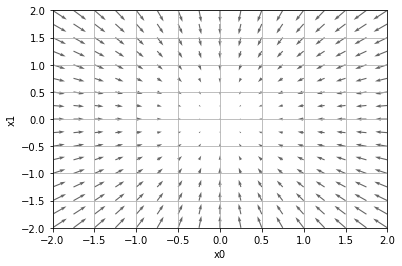

In [2]:
# 図4.9の計算　 pp.105
#　
#
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

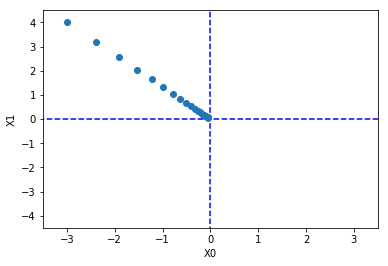

In [10]:
# [4.4.1] 勾配法 図4-10 pp.109
#
import numpy as np
import matplotlib.pylab as plt
from saitobook.common.gradient import numerical_gradient
#from gradient_2d import numerical_gradient

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


#### 4.4.2 ニューラルネットワークに対する勾配

p.110-111


In [16]:
# pp110-111
import sys, os
sys.path.append(os.pardir)  
import numpy as np
from saitobook.common.functions import softmax, cross_entropy_error
from saitobook.common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
p= net.predict(x)

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)


print('net.W = \n', net.W)
print('p = \n', p)
print('dW = \n', dW)


net.W = 
 [[-0.14598015  0.31272223  0.1543014 ]
 [-0.15081796  0.30340197  0.57617239]]
p = 
 [-0.22332426  0.46069511  0.61113599]
dW = 
 [[ 0.11352028  0.22497762 -0.3384979 ]
 [ 0.17028043  0.33746642 -0.50774685]]


***

### 4.5 学習アルゴリズムの実装

- 勾配法では、勾配の情報を使って進む方向を決める。
- 4.4で勾配を勉強する前に、基礎の微分について学ぶ。
- 学習のステップ
 - ステップ1 (ミニバッチ)
 - ステップ2 (勾配の算出)
 - ステップ3 (パラメータの更新)
 - ステップ4 (繰り返す)

#### 4.5.1　 2層ニューラルネットワークのクラス

```
import sys, os
from common.functions import *
from common.gradient import numerical_gradient
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

```

#### 4.5.2 ミニバッチ学習の実装

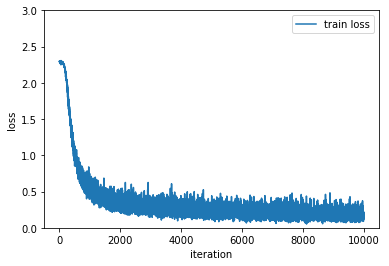

In [21]:
#-----------------------------------
# [4.5.2 ] 　ミニバッチ学習の実装
#  pp.117-119
# --------------------------------
# coding: utf-8
import matplotlib.pylab as plt
import sys, os
sys.path.append('./')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from saitobook.dataset.mnist import load_mnist
from saitobook.common.functions import sigmoid, softmax
from saitobook.samples.two_layer_net_mod import TwoLayerNet
#from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#--- 初期化----------------
train_loss_list = []

#--- ハイパーパラメータ----------------
iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

#--- ネットワーク構築----------------

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#--- ミニバッチ学習----------------

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    

#--- Train Lossグラフの描画--------------------------
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 3.0)
plt.legend(loc='upper right')
plt.show()

#### 4.5.3 テストデータで評価

train acc, test acc |  0.11455, 0.1169
train acc, test acc |  0.7841833333333333, 0.7895
train acc, test acc |  0.8776333333333334, 0.8805
train acc, test acc |  0.8992, 0.9023
train acc, test acc |  0.9086666666666666, 0.9124
train acc, test acc |  0.9138, 0.9177
train acc, test acc |  0.9193, 0.9217
train acc, test acc |  0.9236666666666666, 0.9255
train acc, test acc |  0.9279166666666666, 0.9296
train acc, test acc |  0.9312333333333334, 0.9318
train acc, test acc |  0.9343, 0.9347
train acc, test acc |  0.9370333333333334, 0.936
train acc, test acc |  0.9396166666666667, 0.9385
train acc, test acc |  0.9422333333333334, 0.9405
train acc, test acc |  0.9441333333333334, 0.9421
train acc, test acc |  0.9454166666666667, 0.9432
train acc, test acc |  0.94695, 0.9444


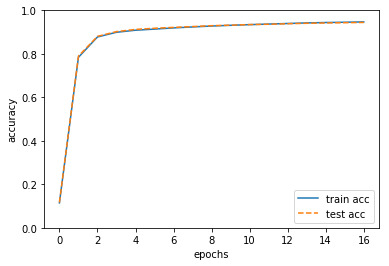

In [17]:
#-----------------------------------
# [4.5.3 ] 　ミニバッチ学習の実装
#  pp.120-121
# --------------------------------
# coding: utf-8
import matplotlib.pylab as plt
import sys, os
sys.path.append('./')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from saitobook.dataset.mnist import load_mnist
from saitobook.common.functions import sigmoid, softmax
from saitobook.samples.two_layer_net_mod import TwoLayerNet
#from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#--- ハイパーパラメータ----------------
iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

#--- ミニバッチ学習----------------

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # １Epoch毎に認識精度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |  " +  str(train_acc) + ", " + str(test_acc))
        #msg = "train acc, test acc | %0.04f  %0.04" % (train_acc,test_acc)
        #print(msg)

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()